# <span style="color:red"> QTM 151 - Quiz 4 </span>

### Submit as an HTML file
### Quiz is open 11:30am to 12:20pm

<font size = "4" >
This quiz is open book 

- You can use the lecture notes
- You will get partial credit for attempting the questions
- To get full credit, the code should work as intended
- You should <span style="color:red"> NOT </span> communicate with other students

Print the following message: <br>

"I will abide by Emory's code of conduct"

In [2]:
# Write your answer here

print("I will abide by Emory's code of conduct")

I will abide by Emory's code of conduct


In [3]:
# import necessary libraries
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt

<font size = "5">

1. Fix an incorrect plot

<font size = "4">

In **Assignment 7** (questions 4 and 5) you used the ``statsmodels.formula.api`` to construct a linear model approximating the relationship between a car's weight and its mpg (miles per gallon).

In the code cell below, I use ``numpy`` to construct a **quadratic** model between these two variables:

$$ m_i \approx a\cdot w_i^2 + b\cdot w_i + c$$

where $m_i$ is the mpg of car $i$, $w_i$ is the weight of car $i$, and $a$, $b$, $c$ are the coefficients of the model. **Everything I do in the first cell is correct.**

In the second cell, I plot both the true data and a line plot of the quadratic model - which should look like a parabola. However, something is clearly off. Change the 2nd code cell so that the Best Quadratic Fit is plotted correctly. (Just like every other question, this can be fixed based on material from Lecture 18)

**For reference, here is what the plot *should* look like**

<img src="quiz_4_files/q1_expected.png" alt="drawing" width = "400"/>

In [9]:
# Everything in this cell is correct - do not change!
df_cars = pd.read_csv("quiz_4_files/features.csv")

independent_var = df_cars["weight"]
dependent_var = df_cars["mpg"]
model_degree = 2

a, b, c = np.polyfit(x = independent_var, y = dependent_var, 
    deg = model_degree)

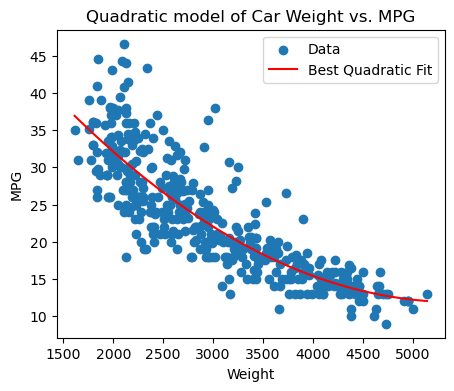

In [ ]:
# RUN THE CELL ABOVE FIRST

df_plot = df_cars

x_data = df_plot["weight"].to_numpy()
y_scatter = df_plot["mpg"].to_numpy()
y_line = a * df_plot["weight"]**2 + b * df_plot["weight"] + c

# can solve by sorting by x values
order = np.argsort(x_data)
x_sorted = x_data[order]
y_sorted = y_line[order]

# Plot
plt.figure(figsize=(5,4))
plt.scatter(x_data, y_scatter, label="Data")
plt.plot(x_sorted, y_sorted, color="red", label="Best Quadratic Fit")
plt.legend()
plt.xlabel("Weight")
plt.ylabel("MPG")
plt.title("Quadratic model of Car Weight vs. MPG")
plt.show()



<font size = "5">

2. Plot multiple variables

<font size = "4">

- Read in the file ``DailyDelhiClimateTrain.csv`` and assign it to a DataFrame. This dataset contains weather data for the city of Delhi, India between January 1st, 2013 and January 1st, 2017.

- The "date" column is in string format, which we know is not ideal. Use ``pd.datetime`` to *replace* the "date" column with one that is in datetime64 format. (You do not need to worry about format codes here)

- Using a DataFrame's ``.plot()`` method, plot the following on a single figure:
    - Time vs. Mean Temperature
    - Time vs. Wind Speed

- Do **not** use Matplotlib.pyplot's ``.plot()`` function. Use the ``.plot()`` method connected to a DataFrame

<Axes: title={'center': 'Delhi Climate: Mean Temperature and Wind Speed Over Time'}, xlabel='date'>

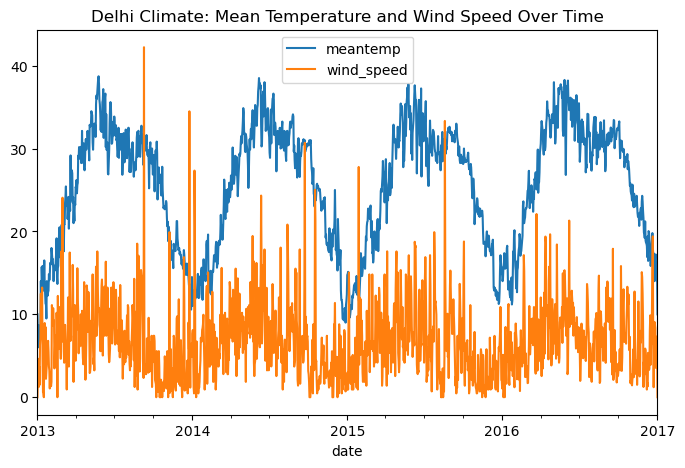

In [ ]:
# your code here

df_delhiclimate = pd.read_csv("quiz_4_files/DailyDelhiClimateTrain.csv")
df_delhiclimate["date"] = pd.to_datetime(df_delhiclimate["date"])
df_delhiclimate.set_index("date", inplace=True)

# Plot multiple variables on a single figure
df_delhiclimate[["meantemp", "wind_speed"]].plot(
    figsize=(8, 5),
    title="Delhi Climate: Mean Temperature and Wind Speed Over Time"
)

<font size = "5">

3. Calculate and plot Percentage Growth

<font size = "4">

- Read in the file ``currencies.csv`` and assign it to a DataFrame. This dataset contains conversion rates to U.S. dollars for both the Euro and the British pound (gbp). The data ranges from January 4th, 1999 to March 31st, 2023.

- Convert the "date_string" column to datetime format, and add it as a new column of the DataFrame with the name "date"

- Compute the percentage growth for both currencies, saving them as new columns with the names "growth_euro" and "growth_gbp". Use both of the methods ``.diff()`` and ``.shift()`` in your computation.

- On a single figure, plot Time vs. both percentage growth values. Give the figure a legend and title, and label the x-axis and y-axis. You can use whichever plot function you would like.

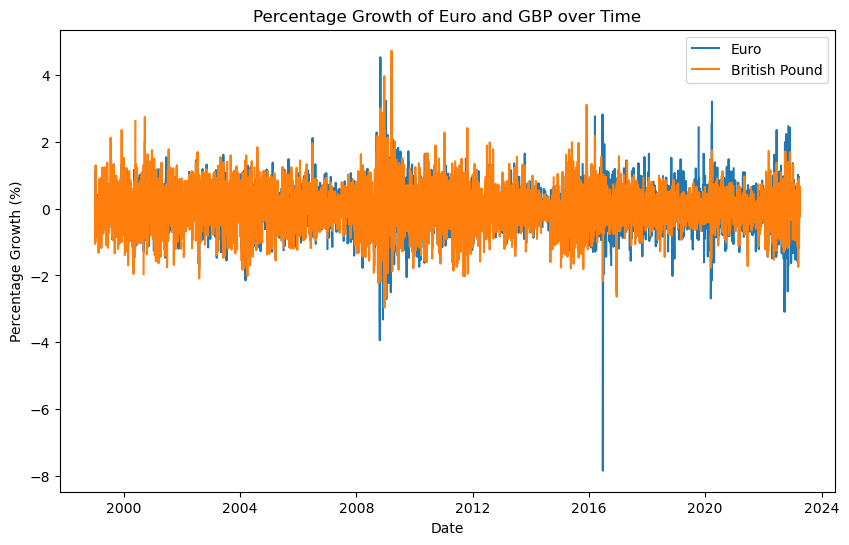

In [20]:
# your code here
df_currency = pd.read_csv("quiz_4_files/currencies.csv")
df_currency["date"] = pd.to_datetime(df_currency["date_string"])

# ((curr - prev) / prev) * 100
df_currency["growth_euro"] = (
    df_currency["eur_to_usd"].diff() / df_currency["eur_to_usd"].shift(1) * 100
)
df_currency["growth_gbp"] = (
    df_currency["gbp_to_usd"].diff() / df_currency["gbp_to_usd"].shift(1) * 100
)

df_currency = df_currency.set_index("date")

# plot
plt.figure(figsize=(10, 6))
plt.plot(df_currency.index, df_currency["growth_euro"], label="Euro")
plt.plot(df_currency.index, df_currency["growth_gbp"], label="British Pound")
plt.xlabel("Date")
plt.ylabel("Percentage Growth (%)")
plt.title("Percentage Growth of Euro and GBP over Time")
plt.legend()
plt.show()

<font size = "5">

4. Boolean type column

<font size = "4">

Continue to use the DataFrame you created in question 3.

- Add a new column to the DataFrame of **Boolean** type. This column should contain "True" when the conversion rate for the Euro is **greater than** 1.9, and "False" otherwise.

- **Note**: This is a condition based on the value of the conversion rate (the original data) and **not** on the percentage growth.

In [23]:
# your code here
df_currency["euro_gt_1.9"] = df_currency["eur_to_usd"] > 1.9

print(df_currency[["eur_to_usd", "euro_gt_1.9"]].head())


            eur_to_usd  euro_gt_1.9
date                               
1999-01-04      1.6581        False
1999-01-05      1.6566        False
1999-01-06      1.6547        False
1999-01-07      1.6495        False
1999-01-08      1.6405        False


<font size = "5">

5. Highlight using ``plt.fill_between``

<font size = "4">

Continue to use the DataFrame you created in question 3.

- Create a line plot of Time vs. Euro conversion rate (**not** percentage growth!). Using the ``plt.fill_between()`` function, highlight the regions where the conversion rate exceeded 1.9.

- Label both axes of the plot, and add a title.

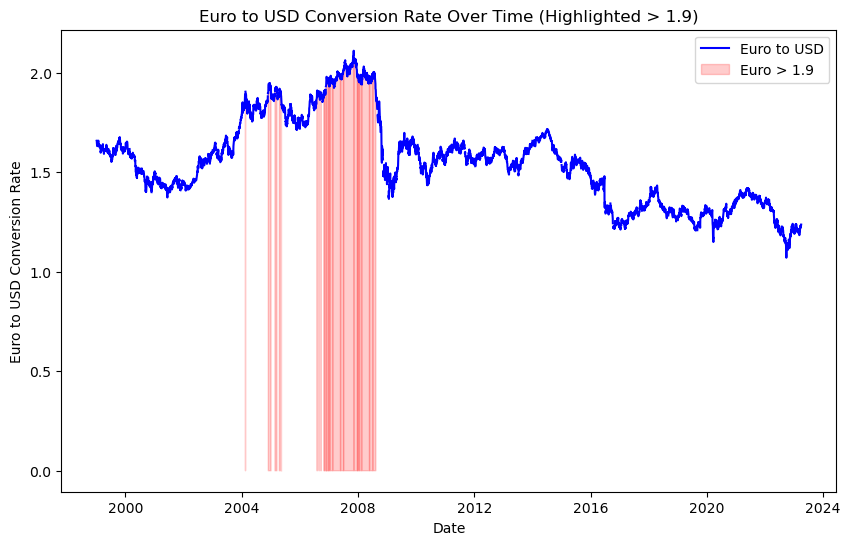

In [ ]:
# your code here

plt.figure(figsize=(10, 6))
plt.plot(df_currency.index, df_currency["eur_to_usd"], label="Euro to USD", color="blue")

plt.fill_between(
    df_currency.index,
    df_currency["eur_to_usd"],
    where=df_currency["eur_to_usd"] > 1.9,
    color="red",
    alpha=0.2,
    label="Euro > 1.9"
)

plt.xlabel("Date")
plt.ylabel("Euro to USD Conversion Rate")
plt.title("Euro to USD Conversion Rate Over Time (Highlighted > 1.9)")
plt.legend()
plt.show()


<font size = "5">

6. Numerically approximate a derivative.

<font size = "4">

The code cell below creates a DataFrame called ``df_trig`` with 3 columns, all of them numerical:

- The "time" column contains evenly spaced points between $0$ and $2\pi$. There are $N+1$ rows containing the values $t_0, t_1, t_2, \dots, t_N$
- The "sin" column contains the values of the sine function evaluated at these points: $\sin(t_0), \sin(t_1), \sin(t_2), \dots, \sin(t_N)$
- The "cos" column contains the values of the cosine function evaluated at these points: $\cos(t_0), \cos(t_1), \cos(t_2), \dots, \cos(t_N)$

Using the ``.diff()`` method, create a new column to the DataFrame named "d_sin_dt" based on the following formula:

$$\frac{\sin(t_{k+1}) - \sin(t_k)}{t_{k+1} - t_k}$$

According to calculus, for large enough $N$, this should approximate the value of $\cos(t_k)$. On a single figure, plot both "time" vs. "cos" and "time" vs. "d_sin_dt". Add a legend, labels the axes, and add a title.

For reference, the figure should look something like this for $N = 25$:

<img src="quiz_4_files/q6_expected.png" alt="drawing" width = "400"/>

**FYI:** If you change $N$ to have a larger value, the two curves should get closer together. For example, when $N = 200$, they virtually lie on top of each other. (You don't have to generate the plot for this case.)

In [30]:
N = 25

# Creates data frame - do not change
t_vals = np.linspace(0, 2*np.pi, N + 1)
sin_vals = np.sin(t_vals)
cos_vals = np.cos(t_vals)

data = {"time" : t_vals, "sin" : sin_vals, "cos" : cos_vals}
df_trig = pd.DataFrame(data)

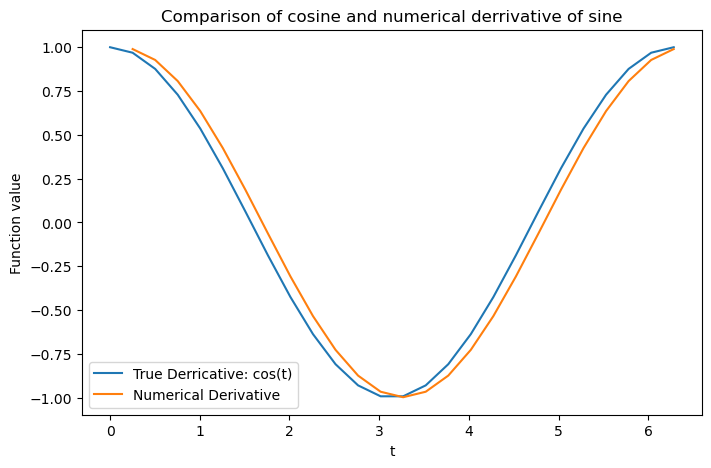

In [33]:
# your code here
df_trig["d_sin_dt"] = df_trig["sin"].diff() / df_trig["time"].diff()
plt.figure(figsize=(8,5))
plt.plot(df_trig["time"], df_trig["cos"], label="True Derricative: cos(t)")
plt.plot(df_trig["time"], df_trig["d_sin_dt"], label="Numerical Derivative")

plt.xlabel("t")
plt.ylabel("Function value")
plt.title("Comparison of cosine and numerical derrivative of sine")
plt.legend()
plt.show()